<a href="https://colab.research.google.com/github/Phund4Bot/DZ/blob/main/lab4algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

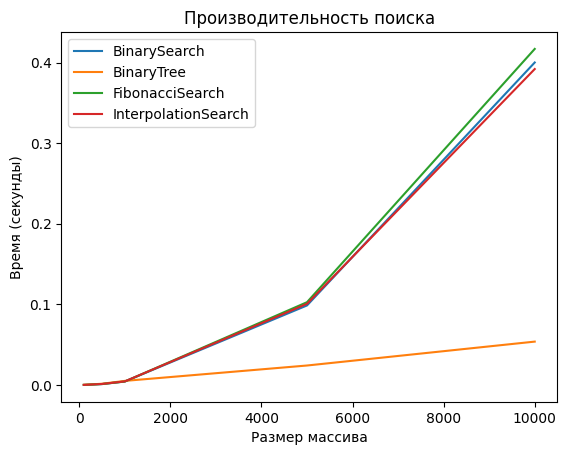

In [7]:
import random, time
import matplotlib.pyplot as plt
def measure_search_performance(search_func, array_sizes, arrays):
    times = []
    for size, arr in zip(array_sizes, arrays):
        # Замер времени поиска
        start_time = time.time()
        search = search_func(arr)
        search.search(random.randint(0, size * 10))
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def plot_search_performance(search_funcs, array_sizes):
    arrays = [random.sample(range(size * 10), size) for size in array_sizes]
    for search_func in search_funcs:
        times = measure_search_performance(search_func, array_sizes, arrays)
        plt.plot(array_sizes, times, label=search_func.__name__)

    plt.xlabel('Размер массива')
    plt.ylabel('Время (секунды)')
    plt.title('Производительность поиска')
    plt.legend()
    plt.show()


array_sizes = [100, 500, 1000, 5000, 10000]
search_funcs = [BinarySearch, BinaryTree, FibonacciSearch, InterpolationSearch]
plot_search_performance(search_funcs, array_sizes)


In [1]:
class BinarySearch:
    def __init__(self, arr):
        self.array = []
        for item in arr:
            self.add(item)

    def add(self, value):
        self.array.append(value)
        self.array.sort()

    def remove(self, value):
        index = self.binary_search(value)
        if index != -1:
            del self.array[index]

    def binary_search(self, value):
        left, right = 0, len(self.array) - 1
        while left <= right:
            mid = (left + right) // 2
            if self.array[mid] == value:
                return mid
            elif self.array[mid] < value:
                left = mid + 1
            else:
                right = mid - 1
        return -1

    def search(self, value):
        index = self.binary_search(value)
        return index if index != -1 else None

arr = [1,2,4]
sorted_array = BinarySearch(arr)
sorted_array.add(5)
sorted_array.add(2)
sorted_array.add(7)
sorted_array.add(3)
print("Индекс элемента 5:", sorted_array.search(5)) # [1, 2, 2, 3, 4, 5, 7]
sorted_array.remove(5)


Индекс элемента 5: 5


In [6]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, array=None):
        self.root = None
        if array:
            for key in array:
                self.insert(key)

    def insert(self, key):
        self.root = self._insert_recursively(self.root, key)

    def _insert_recursively(self, node, key):
        if node is None:
            return TreeNode(key)
        if key < node.key:
            node.left = self._insert_recursively(node.left, key)
        else:
            node.right = self._insert_recursively(node.right, key)
        return node

    def search(self, key):
        return self._search_recursively(self.root, key)

    def _search_recursively(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search_recursively(node.left, key)
        return self._search_recursively(node.right, key)

array = [7, 4, 9, 2, 5, 8, 11]
binary_tree = BinaryTree(array)

In [3]:
class FibonacciSearch:
    def __init__(self, arr):
        self.array = []
        for item in arr:
            self.insert(item)

    def search(self, x):
        def fibonacci(n):
            fib = [0, 1]
            while fib[-1] < n:
                fib.append(fib[-1] + fib[-2])
            return fib

        n = len(self.array)
        fib = fibonacci(n)

        offset = 0
        while fib[-1] > 1:
            i = min(offset + fib[-2], n - 1)
            if self.array[i] < x:
                fib = fib[:-1]
                offset = i
            elif self.array[i] > x:
                fib = fib[:-2]
            else:
                return i

        if fib and offset < n - 1 and self.array[offset + 1] == x:
            return offset + 1

        return -1

    def insert(self, element):
        self.array.append(element)
        self.array.sort()

array = [7, 4, 9, 2, 5, 8, 11]
fib_search = FibonacciSearch(array)
print("Индекс элемента 5:", fib_search.search(5))


Индекс элемента 5: 2


In [4]:
class InterpolationSearch:
    def __init__(self, arr):
        self.arr = []
        for item in arr:
            self.insert(item)

    def insert(self, element):
        self.arr.append(element)
        self.arr.sort()

    def delete(self, element):
        if element in self.arr:
            self.arr.remove(element)
        else:
            print("Element not found in the array.")

    def search(self, target):
        low = 0
        high = len(self.arr) - 1

        while low <= high and self.arr[low] <= target <= self.arr[high]:
            if low == high:
                if self.arr[low] == target:
                    return low
                else:
                    return -1

            pos = low + int((target - self.arr[low]) * (high - low) / (self.arr[high] - self.arr[low]))

            if self.arr[pos] == target:
                return pos
            elif self.arr[pos] < target:
                low = pos + 1
            else:
                high = pos - 1

        return -1
arr = [1, 2, 3, 3, 5, 6, 7, 8, 9, 11, 13, 15]
search_obj = InterpolationSearch(arr)

search_element = 11
index = search_obj.search(search_element)
if index != -1:
    print(f"Element {search_element} found at index {index}.")
else:
    print(f"Element {search_element} not found.")

Element 11 found at index 9.


In [ ]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def hash_function(self, key):
        return key % self.size

    def rehash(self, old_hash):
        return (old_hash + 1) % self.size

    def put(self, key, data):
        hash_value = self.hash_function(key)

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data
            else:
                next_slot = self.rehash(hash_value)
                while self.slots[next_slot] is not None and self.slots[next_slot] != key:
                    next_slot = self.rehash(next_slot)

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def get(self, key):
        start_slot = self.hash_function(key)

        data = None
        stop = False
        found = False
        position = start_slot

        while self.slots[position] is not None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position = self.rehash(position)
                if position == start_slot:
                    stop = True
        return data

h_table = HashTable(11)
h_table.put(11, "apple")
h_table.put(22, "banana")
h_table.put(33, "cherry")

print(h_table.get(11))  # apple
print(h_table.get(22))  # banana
print(h_table.get(33))  # cherry


apple
banana
cherry


In [ ]:
import random

class HashTable:
    def __init__(self, size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def hash_function(self, key):
        return key % self.size

    def random_hash_function(self, key):
        random.seed(key)
        return random.randint(0, self.size - 1)

    def put(self, key, data):
        hash_value = self.hash_function(key)

        if self.slots[hash_value] is None:
            self.slots[hash_value] = key
            self.data[hash_value] = data
        else:
            if self.slots[hash_value] == key:
                self.data[hash_value] = data
            else:
                next_slot = self.random_hash_function(key)
                while self.slots[next_slot] is not None and self.slots[next_slot] != key:
                    next_slot = self.random_hash_function(next_slot)

                if self.slots[next_slot] is None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data

    def get(self, key):
        start_slot = self.hash_function(key)
        data = None
        stop = False
        found = False
        position = start_slot

        while self.slots[position] is not None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position = self.random_hash_function(key)
                if position == start_slot:
                    stop = True
        return data

h_table = HashTable(11)
h_table.put(11, "apple")
h_table.put(22, "banana")
h_table.put(33, "cherry")
h_table.put(22, "apple")

print(h_table.get(11))
print(h_table.get(22))
print(h_table.get(33))

apple
apple
cherry


In [ ]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * self.size

    def hash_function(self, key):
        return key % self.size

    def put(self, key, value):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = Node(key, value)
        else:
            current = self.table[index]
            while current.next is not None:
                current = current.next
            current.next = Node(key, value)

    def get(self, key):
        index = self.hash_function(key)
        current = self.table[index]
        while current is not None:
            if current.key == key:
                return current.value
            current = current.next
        return None

# Пример использования
h_table = HashTable(11)
h_table.put(11, "apple")
h_table.put(22, "banana")
h_table.put(33, "cherry")

print(h_table.get(11))  # Выведет: apple
print(h_table.get(22))  # Выведет: banana
print(h_table.get(33))  # Выведет: cherry


apple
banana
cherry


In [ ]:
def is_safe(board, row, col):
    for i in range(row):
        if board[i][col] == 1:
            return False

    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    for i, j in zip(range(row, -1, -1), range(col, len(board))):
        if board[i][j] == 1:
            return False

    return True

def solve_n_queens(board, row):
    if row >= len(board):
        return True

    for col in range(len(board)):
        if is_safe(board, row, col):
            board[row][col] = 1
            if solve_n_queens(board, row + 1):
                return True
            board[row][col] = 0

    return False

def print_solution(board):
    for row in board:
        print(" ".join(map(str, row)))

def n_queens():
    board = [[0] * 8 for _ in range(8)]
    if solve_n_queens(board, 0):
        print("Решение найдено:")
        print_solution(board)
    else:
        print("Решение не найдено.")

n_queens()


Решение найдено:
1 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1
0 0 0 0 0 1 0 0
0 0 1 0 0 0 0 0
0 0 0 0 0 0 1 0
0 1 0 0 0 0 0 0
0 0 0 1 0 0 0 0
